In [22]:
import pandas as pd
import numpy as np
import pybaseball as baseball
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [23]:
#get batting data
d = baseball.fg_batting_data(start_season=2023)

In [24]:
#only include where ab is within 2 st devs from mean (remove players AB low)
def MinReqAB(dataset):
    minABRequirement = np.average(dataset.AB)-np.std(dataset.AB)*2
    meetsRequirement = dataset['AB'] >= minABRequirement
    return dataset[meetsRequirement]
d = MinReqAB(d)

In [46]:
def BattingStat(nameStatistic, datasetStat, getTeam):
    d[nameStatistic]=d[datasetStat] / d["AB"]
#ranked batting average
    d[nameStatistic + '_RankPercentage'] = d[datasetStat].rank()/d[datasetStat].count()
    Team = d[d['Team'] == getTeam]
    
    
#plot default
    #set plot size
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    #set white and remove grid
    sns.set_style("whitegrid", {'axes.grid' : False})
    palette = itertools.cycle(sns.color_palette())


    for index, players in Team.iterrows():
        ax = sns.histplot(d[nameStatistic], stat='probability', color='black', alpha = .2, kde=True)
        ax.containers[0].remove() # remove the bars
        ax.axvline(players[nameStatistic], label = players['Name'], color=next(palette))
        ax.set(xlabel=nameStatistic, ylabel='Frequency')
        ax.legend()
    print(Team[['Name', nameStatistic, nameStatistic + '_RankPercentage']])

               Name  Batting_Average  Batting_Average_RankPercentage
27      Kyle Tucker         0.288889                        0.730556
99     Alex Bregman         0.222222                        0.438889
28   Yordan Alvarez         0.253333                        0.222222
93      Jeremy Pena         0.240385                        0.655556
96   Mauricio Dubon         0.315217                        0.880556
175      Jose Abreu         0.242991                        0.730556


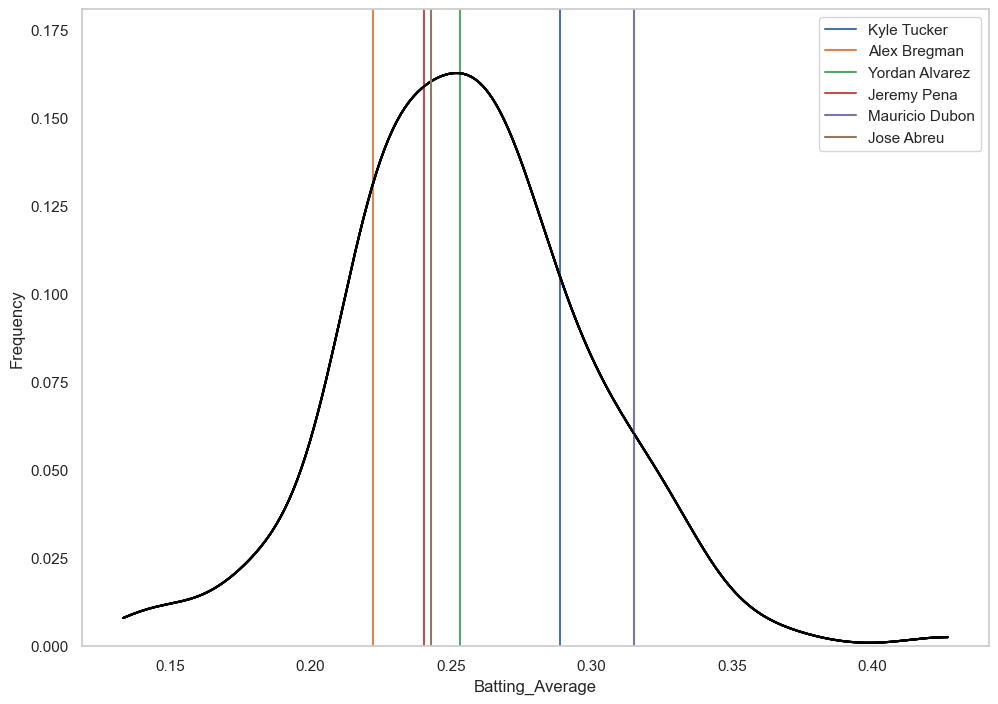

In [52]:
BattingStat("Batting_Average", "H", "HOU")

In [ ]:
#for team get batting averages and plot against MLB seasonal BA
def getTeamBattingAvg(getTeam):
    Team = d[d['Team'] == getTeam]
    palette = itertools.cycle(sns.color_palette())

#plot default
    #set plot size
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    #set white and remove grid
    sns.set_style("whitegrid", {'axes.grid' : False})

    for index, players in Team.iterrows():
        ax = sns.histplot(d['BA'], stat='probability', color='black', alpha = .2, kde=True)
        ax.containers[0].remove() # remove the bars
        ax.axvline(players['BA'], label = players['Name'], color=next(palette))
        ax.set(xlabel='Batting Average', ylabel='Frequency')
        ax.legend()
    print(Team[['Name', 'BA', 'BARankPercentage']])